<a href="https://colab.research.google.com/github/harsh-jaiswal13/DATA-ANALYSIS-PROJECTS/blob/main/The_best_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

# | Field          | Description                                                                           |
# | -------------- | ------------------------------------------------------------------------------------- |
# | Loan_status    | Whether a loan is paid off on in collection                                           |
# | Principal      | Basic principal loan amount at the                                                    |
# | Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
# | Effective_date | When the loan got originated and took effects                                         |
# | Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
# | Age            | Age of applicant                                                                      |
# | Education      | Education of applicant                                                                |
# | Gender         | The gender of applicant                                                               |


In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv



--2022-04-08 06:23:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv!wget
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-04-08 06:23:33 ERROR 404: Not Found.

--2022-04-08 06:23:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Reusing existing connection to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:443.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_t

In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


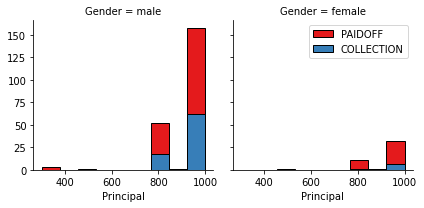

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

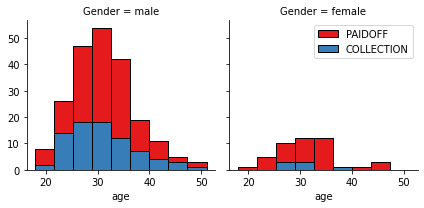

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

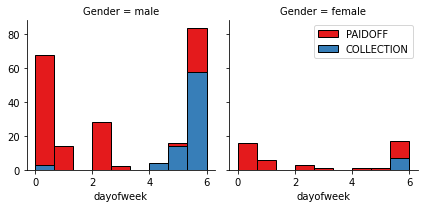

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [ ]:
df=df.sample(frac=1)
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
116,1000,15,22,0,1,0,0,1
78,1000,30,34,0,1,0,0,1
145,800,15,35,0,0,0,1,0
106,800,15,43,0,1,0,1,0
43,800,15,35,1,1,1,0,0


In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
116,1000,15,22,0,1,0,0,1
78,1000,30,34,0,1,0,0,1
145,800,15,35,0,0,0,1,0
106,800,15,43,0,1,0,1,0
43,800,15,35,1,1,1,0,0


In [ ]:
y = df['loan_status'].values


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
# sample=.sample(n = 1)
y[:16]
X[12:14]

array([[ 0.51578458,  0.92071769,  0.67333883,  2.37778177,  0.82934003,
         2.61985426, -0.87997669, -0.86968108],
       [-1.31458942, -1.96168647,  0.67333883, -0.42056004,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108]])

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-04-08 06:23:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-04-08 06:23:36 (597 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [101]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
y_actual=test_df['loan_status']
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


# test_dfd=test_df.sample(frac=1)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)


x_t = test_Feature

x_t= preprocessing.StandardScaler().fit(x_t).transform(x_t)
test_Feature.shape


(54, 8)

In [102]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score as js



In [103]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['PAIDOFF', 'COLLECTION'])
y_actual_b=le.transform(y_actual)

KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

y_pred_knn=neigh.predict(x_t)
y_pred_knn_b=le.transform(y_pred_knn)

f1=f1_score(y_pred_knn,y_actual,average='micro')
ll=log_loss( y_actual_b,y_pred_knn_b)
jscore=js(y_actual_b,y_pred_knn_b)

print(f'''f1 score  for Decision trees {f1}
log_loss for Decision trees {ll}
j-index for Decision trees {jscore}''')  



f1 score  for Decision trees 0.6481481481481481
log_loss for Decision trees 12.15268050884454
j-index for Decision trees 0.62


Decision trees

In [106]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

y_pred_dt=clf.predict(x_t)
y_pred_dt_b=le.transform(y_pred_dt)

f1=f1_score(y_pred_dt,y_actual,average='micro')
ll=log_loss( y_actual_b,y_pred_dt_b)
jscore=js(y_actual_b,y_pred_dt_b)



print(f'''f1 score  for Decision trees{f1}
log_loss for Decision trees{ll}
j-index for Decision trees {jscore}''')  


f1 score  for Decision trees0.6851851851851852
log_loss for Decision trees10.873436953572652
j-index for Decision trees 0.6458333333333334


Logistic regression

In [107]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0).fit(X, y)

y_pred_lreg=lreg.predict(x_t)
y_pred_lreg_b=le.transform(y_pred_lreg)

f1=f1_score(y_pred_lreg,y_actual,average='micro')
ll=log_loss( y_actual_b, y_pred_lreg_b)
jscore=js(y_actual_b,y_pred_lreg_b)

print(f'''f1 score  for logistic regression{f1}
log_loss for logistic regression {ll}
j-index for logistic regression {jscore}  
  ''')



f1 score  for logistic regression0.7592592592592593
log_loss for logistic regression 8.315083109267249
j-index for logistic regression 0.7547169811320755  
  


SVM

In [108]:
from sklearn import svm
clf= svm.SVC().fit(X,y)
y_pred_svm=clf.predict(x_t)
y_pred_svm_b=le.transform(y_pred_lreg)


f1=f1_score(y_pred_svm,y_actual,average='micro')
ll=log_loss( y_actual_b, y_pred_svm_b)
jscore=js(y_actual_b,y_pred_svm_b)

print(f'''f1 score  for svm {f1}
log_loss for svm {ll}
j-index for svm {jscore}  
  ''')


f1 score  for svm 0.7222222222222222
log_loss for svm 8.315083109267249
j-index for svm 0.7547169811320755  
  
